# 📚 Importación de librerías

Importación de Pandas, Numpy, Matplotlib. También importación de SK Learn, librería esencial para **Aprendizaje de Máquina Supervisado**.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model as lm

print(F"¡Importación correcta de Pandas! Versión: {pd.__version__}")
print(F"¡Importación correcta de Numpy! Versión: {np.__version__}")
print(F"¡Importación correcta de Matplotlib! Versión: {plt.matplotlib.__version__}")
print(F"¡Importación correcta de SK Learn! Versión: {sklearn.__version__}")

¡Importación correcta de Pandas! Versión: 2.2.2
¡Importación correcta de Numpy! Versión: 1.26.4
¡Importación correcta de Matplotlib! Versión: 3.9.2
¡Importación correcta de SK Learn! Versión: 1.5.1


# 🔢 Creación del conjunto de datos

Creación de datos simulados para formar la base de aprendizaje en la regresión lineal (datos etiquetados).

In [3]:
# Simulamos datos de autos para entrenar el modelo de regresión lineal simple.
# La variable independiente será el tamaño del motor (en litros).
# La variable dependiente será el consumo de combustible (km/l).

datos = {
    # Variable independiente (X)
    "Motor": [1.0, 1.3, 1.6, 2.0, 2.4],
    # Variable dependiente (y)
    "Consumo": [18, 16, 14, 12, 10]
}

df = pd.DataFrame(datos)
df

,Motor,Consumo
0,1.0,18
1,1.3,16
2,1.6,14
3,2.0,12
4,2.4,10


In [4]:
# X debe ser un DataFrame (matriz de n filas y 1 columna en este caso).
# y puede ser una Serie (una lista de valores).
X = df[["Motor"]]  # Doble corchete para que siga siendo DataFrame
y = df["Consumo"]  # Serie

X.head(), y.head()

(   Motor
 0    1.0
 1    1.3
 2    1.6
 3    2.0
 4    2.4,
 0    18
 1    16
 2    14
 3    12
 4    10
 Name: Consumo, dtype: int64)

# 💻 1) Regresión Lineal Simple

Sección donde se crea el objeto de Regresión Lineal para ser entrenado.

In [5]:
# Creamos el modelo de regresión lineal
modelo_simple = lm.LinearRegression()

# Entrenamos el modelo con los datos
modelo_simple.fit(X, y)

LinearRegression()

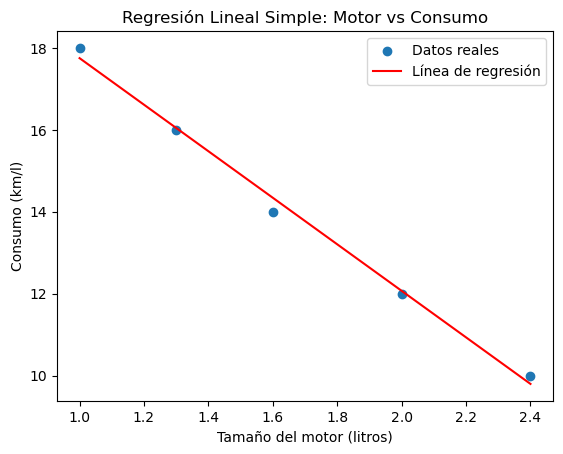

In [6]:
# Graficamos los puntos reales
plt.scatter(df["Motor"], df["Consumo"], label="Datos reales")

# Graficamos la línea de regresión predicha por el modelo
plt.plot(df["Motor"], modelo_simple.predict(X), color="red", label="Línea de regresión")

# Etiquetas y leyenda
plt.xlabel("Tamaño del motor (litros)")
plt.ylabel("Consumo (km/l)")
plt.title("Regresión Lineal Simple: Motor vs Consumo")
plt.legend()
plt.show()

In [8]:
# Queremos predecir el consumo de un auto con motor de 1.8 litros
prediccion_simple = modelo_simple.predict(pd.DataFrame({"Motor": [1.8]}))
print(f"Consumo estimado para un motor 1.8L: {prediccion_simple[0]:.2f} km/l")


Consumo estimado para un motor 1.8L: 13.20 km/l


# 💻 2) Regresión Lineal Compleja

Sección donde se crea el objeto de Regresión Lineal para ser entrenado con una relación compleja (varias variables independientes)

In [9]:
# Ahora añadiremos más variables:
# - Motor: tamaño del motor (litros)
# - Peso: peso del vehículo en kg
# - Transmision: 0 para manual, 1 para automática
# La variable objetivo seguirá siendo el consumo de combustible (km/l)

datos_multivariables = {
    "Motor": [1.0, 1.3, 1.6, 2.0, 2.4],
    "Peso": [900, 1000, 1200, 1400, 1600],
    "Transmision": [0, 0, 1, 1, 1],
    "Consumo": [18, 16, 14, 12, 10]
}

df_multi = pd.DataFrame(datos_multivariables)
df_multi

,Motor,Peso,Transmision,Consumo
0,1.0,900,0,18
1,1.3,1000,0,16
2,1.6,1200,1,14
3,2.0,1400,1,12
4,2.4,1600,1,10


In [10]:
# Ahora X tendrá varias columnas (Motor, Peso, Transmision)
X_multi = df_multi[["Motor", "Peso", "Transmision"]]
y_multi = df_multi["Consumo"]

X_multi.head(), y_multi.head()

(   Motor  Peso  Transmision
 0    1.0   900            0
 1    1.3  1000            0
 2    1.6  1200            1
 3    2.0  1400            1
 4    2.4  1600            1,
 0    18
 1    16
 2    14
 3    12
 4    10
 Name: Consumo, dtype: int64)

In [12]:
# Creamos el modelo de regresión lineal múltiple
modelo_multiple = lm.LinearRegression()

# Entrenamos el modelo con varias variables independientes
modelo_multiple.fit(X_multi, y_multi)

LinearRegression()

In [14]:
# Predecimos el consumo de un auto con:
# - Motor: 1.8 L
# - Peso: 1300 kg
# - Transmisión: automática (1)

prediccion_multiple = modelo_multiple.predict(pd.DataFrame({"Motor": [1.8],
                                                            "Peso": [1300],
                                                            "Transmision": [1]}))
print(f"Consumo estimado: {prediccion_multiple[0]:.2f} km/l")

Consumo estimado: 13.00 km/l


In [15]:
# Coeficientes de cada variable
print("Coeficientes de cada variable:", modelo_multiple.coef_)
print("Intersección:", modelo_multiple.intercept_)

Coeficientes de cada variable: [-1.e+01  1.e-02 -1.e+00]
Intersección: 19.00000000000002
